In [16]:
# Initialize Otter
import otter
grader = otter.Notebook("hw9.ipynb")

# Homework 9: Predictive Modelling and Model Comparision

Name: Emily Zeiberg

Student ID: 498464

Collaborators: Amy, James, Max (all TAs)


## Instructions

This is the final homework/Project, which is about Understanding Data Profiling, Feature Engineering, Feature Selection, Model Comparision & Selection as a _final project_ for our 217a class.

We will be using the techniques and approaches introduced throughout the course focusing mainly towards the second half of the semester:

* [M0] Python for DS
* [M1] The DS and ML Workflows
* [M2] Exploratory Data Analsyis
* **[M3] Linear Regression (if applicable - depends on problem/dataset)**
* **[M4] Linear Classification (if applicable - depends on problem/dataset)**
* [M5] Sentiment Analysis (if applicable - depends on problem/dataset)
* [M6] Learning Principles and Ethical Thinking for DS
* **[M7] Clustering K-Means (if applicable - depends on problem/dataset)** 
* **[M8] Similarity-based Learning K-NN (if applicable - depends on problem/dataset)**
* **[M9] More Models (Decision Tree, Random Forest, Neural Network) for Feature Engineering & Model Comparision & Selection**
* **[M10] Creating & Managing Model pipeline for ML workflow**

The main focus of this project is majorly on the last modules [M3]-[M10]. In particular, it will be helpful to review **Lab 3 & hw 3 onwards for more clarification**.
Most of the things you will do in this final project are explained in `Lab9` and `Lab 10`. Then, review the other labs and hws to recap the general workflow of our DS approaches to the various problems we have worked on so far. This will help you to be prepared for all the steps in this project, so that you do not miss anything. 

In gernal, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend).

Additionally, note that this assignment is more like a project than a typical homework and it will have a slightly different structure than the hws in the past. One of the reasons why Jupyter Notebooks are so popular in the field is because you can really treat them like notebooks to explain your findings as you discover them. In this assignment, we provide some **Problem** stubs following the DS workflow and you will need to fill in the analysis and structure as you go.

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. 

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

In [17]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings

# your code here
answer = 'https://pypi.org/project/pandas-profiling/'
answer2 ='https://stackoverflow.com/questions/49314314/unable-to-import-pandas-profiling'
answer3 = 'Some code is from lab who I worked on with Elaine Choy, Eric You, Vishnu Arun, and Yifan Yuan'

### Submission instructions
* Submit this Python notebook, including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

<!-- BEGIN QUESTION -->

## 1. Introduction

For our final project this semester, we'll take a look at data for California Housing Price Prediction
https://www.kaggle.com/subashdump/california-housing-price-prediction/data 


As you have seen throughout the semseter we have learned various techniques to solve a problem task (Classification, Regression, Clustering etc.) starting from problem formulation to EDA to model building to model evaluation and performing feaure engineering and selection in order to improve the model's performance.
You will be combining all the knowledge learned so far in this final project. You will be making assuptions and decisions on your own with appropriate justifications in writeups about how to improve the prediction model using all the tools and techniques learned so far and provide the best model at the end.


The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Our goal will be to use this dataset to gain some insight about characteristics of different features.
We will be using data profiling from pandas and create models (hopefully more than 3) and complare them to find out which model performed the best and probably explain why it is the best model among all in this data.


In [18]:
#import packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

### Problem 1.1

Download the data and load it in this notebook for further processing and analysis.

**Write-up!** Describe the data, answering questions including, but not limited to, these: Where does the data come from? How was it obtained? How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take? what kind of relationship you would explore in this dataset and on what features? 
> **Hint**: Consider the steps of EDA; what would you like to know about this dataset. 

In [19]:
data = pd.read_csv("utility/data/housing.csv") #reading csv file and storing it in a dataframe
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

This data was downloaded from Kaggle. It was collected from the 1990 California census. It has 20640 examples with 10 features. All of the features, except ocean_proximity, takes a numerical value, while ocean_proximity is categorical. All of the numerical features are continuous, and the categorical feature is ordinal. All of the fetures are related to the block, so any median values are the median of the houses within a block of eachother, and any total values are the total of all the houses within a block. I want to explore how the features affect the median_house_value, since the price of a house is affected by all of the features provided.

### Problem 1.2
### Getting Familiar with the Data

Install the pandas data profile dependencies and import them to generate the data report using __df.profile_report__. 


**Write-up!** What is the Domain/Area of this dataset and what kind of prediction (regression, classification or clustering) we are doing with this dataset and why? Describe the additional insights (if any) you get from generating the pandas data profile report, which you did not observe in the previous EDA steps. Does it change your thinking process or provide any ideas about data pre-processing or processing steps? 

The domain is a business problem. When people are looking to place their house on the market, they need to know what price to list the house based on its location and design. If a house is priced too high, people won't be interested in buying it, but if it's priced too low, the current owner won't make as much money off the sale. This is a regression problem because the pricing of the house is a numerical value that is predicted on a continuous scale. For a regression model using one variable, median income would be the best predictor since it's the most correlated with median house value. This report showed that I have to get rid of null values since there are over 200 of them. I also should encode the catoegorical feature since it's the only non-numerical value. 

In [20]:
# BEGIN SOLUTION
import sys
#!{sys.executable} -m pip install pandas-profiling
import pandas as pd
from pandas_profiling import ProfileReport
# END SOLUTION

In [21]:
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Problem 1.3: Data Description and Pre-processing

**Write-up!** What are the major highlights and interesting points in the report generated in the previous cell (or your own EDA process). 
Describe your insights and thought process regarding those insightful aspects of the data/features/graph/statistics in terms of general relationship among features such as correlation, interaction, cardinality, distribution, missing data, outliers etc.


In [22]:
# BEGIN SOLUTION
data_new = data
data_new['ocean_proximity'] = data_new['ocean_proximity'].replace({item: i for i, item in enumerate(data_new['ocean_proximity'].unique())})
    #NEAR BAY = 0; <1H OCEAN = 1; INLAND = 2; NEAR OCEAN = 3; ISLAND = 4
    
# END SOLUTION

Total rooms, total bedrooms, population, and households are correlated with each other. Median house value and median income are also correlated. Longitude and latitude are negatively correlated with each other. Positive correlations are shown in dark blue and negative correlations are shown in red on the chart. The median house value with the greatest frequency is 500001, so I am assuming that any house with a value of 500001 or greater was all said to be worth 500001 since it's unlikely that the most houses cost this exact amount. I also think any house that was older than 52 years old was said to be 52 years old for the same reason. Total rooms, total bedrooms, population, and households have significant outliers. Median income also has outliers, but this is more expected since there are people of many different economic classes. Total bedrooms has a lot of missing data.

### Problem 1.4: Split the Data (you will be using the same data split (train-validation-test) for all the models in the following questions )

Extract input (X) and output (y) data from the dataset. 

Use the train and test split and k-fold cross validation (use 5 fold cross validation) from the scikit learn library to split the data into 80% training and 20% testing.

**NOTE** Remember that you will be using the same cross validation and train test splits values for all the predictive modeling part (Problem 3) for the fair comparision at the end. 

**Write-up!** Why 80% train and 20% test split is considered a good practice? How would you pick the train-test split size if the dataset is relatively small or large? What is the purpose of using cross validation technique and how does it ensure model robustness? What is Data snooping and how do you avaoid it?

80% of the data should be used for training so that the model has enough samples to learn from, and this helps to ensure the model is general enough for all the data and that it's not too specific for just a couple of samples. 20% should be used for testing so that majority of the data is used for training, but there are still enough samples to test a wide range of examples. If the data is relatively small, then I have to make sure that there is enough variety in the training data and that all of the features are equally represented. I also have to make sure the test data set is large enough to test all possible cases. If the dataset is large, the test set can be smaller since a smaller percentage of data will be sufficient enough to test all possible cases. Cross validation helps to evaluate the model while still making changes to the model parameters. Since the model has already seen this data, the validation set shouldn't be used as the final evaluation of the model (the test set should be used instead). Data snooping is when the person or model looks at the data before making predictions. This can lead to overfitting or to more signifigant results than there should be. This can be avoided by having train, validation, and test data sets that are not looked at until it is appropriate to do so. This can also be avoided by conducting multiple evaluation/accuracy tests.

In [25]:
# BEGIN SOLUTION
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

X = data_new.drop(columns=['median_house_value']) #Extracting target variable
y = data_new['median_house_value'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #Splitting into test and train

mean_bedrooms = X_train["total_bedrooms"].mean()
data_new["total_bedrooms"].fillna(mean_bedrooms, inplace = True) #replacing missing values in total_bedrooms with the mean of the feature from the training dataset
X_train["total_bedrooms"].fillna(mean_bedrooms, inplace = True)
X_test["total_bedrooms"].fillna(mean_bedrooms, inplace = True)

kf = KFold(n_splits=5, shuffle=True) #Preparing to split training data into a validation set
# END SOLUTION

/Users/emzeiberg/opt/miniconda3/envs/cse217a/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


### Problem 1.5: Perform Linear Regression

Let's create a baseline model here:

Perform Linear Regression on training data. Predict the output for the test dataset using the fitted model. Print the root mean squared error (RMSE) and R^2 value from Linear Regression for test data set.



**Write-up!** Why do we use R^2 values when we have other error measures (MAE, MSE, RMSE etc.)?

R^2 is the most intuitive since 1 corresponds to an accurate model, and 0 corresponds to a non-accurate model. The other methods are less intuitive because of the range of value they use and also they may have factors that don't make as much sense (such as using different units).

In [26]:
# BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2_linear = np.zeros(5)
rmse_linear = np.zeros(5)
X_train_arr = np.array(X_train)
y_train_arr = np.array(y_train)
for fold, (train_idx, test_idx) in enumerate(kf.split(X_train)): #Creating a new model for each validation set
    model_linear = LinearRegression()
    model_linear.fit(X_train_arr[train_idx], y_train_arr[train_idx]) #fitting model
    y_pred_linear = model_linear.predict(X_train_arr[test_idx]) #Predictions using validation set
    r2 = r2_score(y_train_arr[test_idx], y_pred_linear)
    rmse = np.sqrt(mean_squared_error(y_train_arr[test_idx], y_pred_linear))
    r2_linear[fold-1] = r2
    rmse_linear[fold-1] = rmse
print('R^2: {}' .format(r2_linear.mean()))
print('RMSE: {}' .format(rmse_linear.mean()))
# END SOLUTION

R^2: 0.6334974642618895
RMSE: 70267.39486998208


## 2. Feature Engineering

### Problem 2.1 

Identify features which needs feature engineering after looking at the baseline model's result. Perform Feature Tranformation/Manipulation/Engineering in this step and use this knowledge in predictive modeling part. 

Apply some feature generation technices in order to make those features more useful for the data such as checking the datatypes, handling missing values, extracting new features from existing ones, encoding some features if categorical, scaling, standardization etc. 

**Write up!** Explain your reasoning for selecting features and performing those specific feature engineering steps respectively.

**Do this!** In the cells below, **explain** and perform the steps that you need to prepare this data for further analysis. Make sure that your implementations and write-ups (for processing and analysis) are presented well and effectively describe your workflow. You may add comments or markdown cells for your documentation as you see fit!  

*Grading Note: Your work will be graded for _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report.*

> **Hint**: You can use our previous labs as examples of how you might do this. 
Also, you might want to come back to this step later on, since you might encounter problems with the data once you actually analyze it. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

I already enocoded the catagorical data in problem 1.3. I did this so that the linear regression model could use this feature, and it's easier to process numerical data than catagorical data. I also replaced the missing values in total_bedrooms with the mean of that feature. This is helpful so that I don't have to delete the entire sample because of one missing value. In the next cell, I create new data sets for scaled x train and x test. This is an important step since some models only work well if each feature within the data is a similar size, and standardization helps to do this. In section 2.3, I also try feature selection using a random forest classifier, and I try to generate my own feature. Feature selection is useful since only features with a high importance score are used, so there isn't excess/nonrelavent features affecting predictions. Feature generation can help to provide additional useful features to the model.


In [28]:
# BEGIN SOLUTION

#Encoded data in 1.3
#Replace missing values in 1.4

#Standardize data
scaler = preprocessing.StandardScaler().fit(X_train) # computing the mean and standard deviation on a training set 
X_train_scaled = scaler.transform(X_train) # apply the transforamtion to the trainnig set
X_test_scaled = scaler.transform(X_test) # apply the transforamtion to the test set

# END SOLUTION


### Problem 2.2: Perform Basic Feature Manupilation & Data Transformation

1. Be consistent with the feature engineering process in train and test data. No data snooping.
2. Handle Missing data: Fill the missing values with the mean of the respective column.
3. Encode categorical data: Convert categorical column in the dataset to numerical data.
4. Standardize data: Standardize training and test datasets.

### Problem 2.3: Perform Feature Engineering (Feature Selection or/and Feature Generation) including but not limited to statistical, ML based, Newly extracted/created features etc. wherever appropriate/applicable in the respective Predictive Modeling part.


In [29]:
# BEGIN SOLUTION
#Missing values were already replaced in problem 1.4

#categorical data is already encoded in problem 1.3

#Extracting if the homes are in a crowded area. 1 if population is greater than 2000, 0 otherwise.
for dataset in [X_train, X_test]:
    dataset["dense_area"] = dataset["population"].apply(lambda x: 1 if x > 2000 else 0)

print(X_train)

#data is already standardized (problem 2.1)



# END SOLUTION

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4351     -118.36     34.10                36.0       2963.0           838.0   
13945    -117.20     34.26                17.0       9419.0          1455.0   
19154    -122.69     38.37                 8.0       6322.0          1001.0   
2492     -120.18     36.59                25.0        948.0           198.0   
2900     -119.01     35.37                44.0        593.0           136.0   
...          ...       ...                 ...          ...             ...   
18203    -122.05     37.38                23.0       3200.0           907.0   
18443    -121.82     37.25                25.0       4021.0           634.0   
8908     -118.47     34.03                31.0       2642.0           681.0   
11636    -118.03     33.83                25.0       3030.0           532.0   
19498    -121.01     37.65                47.0       1713.0           334.0   

       population  households  median_income  ocean

/Users/emzeiberg/opt/miniconda3/envs/cse217a/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
#Performing feature selection
def get_RF_mask(X_in,y_in, model_in):
    
    importance = None
    mask = None
    model_in.fit(X_in, y_in)
    importance = model_in.feature_importances_ #Calculates feature importance
    print(importance)
    median_importance = np.median(importance)
    mask = importance > median_importance
    
    return mask
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, random_state=10) #Using random forest model

rf_mask = get_RF_mask(X_train, y_train, model) 

X_train_selected = np.array(X_train)[:,rf_mask] #applying mask
print(f'     All Features: {X_train.shape}')
print(f'Selected Features: {X_train_selected.shape}')


[0.1180443  0.11841435 0.10719633 0.1264934  0.11788256 0.12403368
 0.11791465 0.14859835 0.01399166 0.00743074]
     All Features: (16512, 10)
Selected Features: (16512, 5)


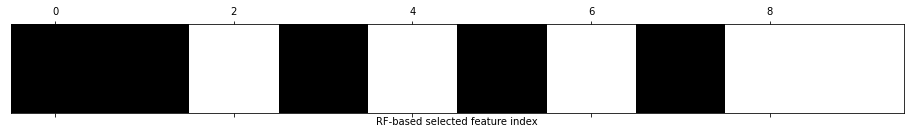

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [31]:
#Plotting which features were selected
plt.matshow(rf_mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("RF-based selected feature index")
plt.yticks(())
plt.show()
print(data)

In [32]:
#Creating new test and train datasets using standardized data
X_train_engineered = X_train_scaled[:,:8]
X_test_engineered = X_test_scaled[:,:8]


## 3. Predictive Modeling [Using scikit learn pipeline is highly encouraged]

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

1. Build a model of housing prices to predict median house values in California using the provided dataset.
2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.
3. Predict housing prices based on median_income and plot the regression chart for it.

### Problem 3.1 : Perform K-Nearest Neighbors Regression

Perform K-Nearest Neighbors Algorithm for Regression on the training data.

Predict output for the test dataset using the fitted model.

Print root mean squared error (RMSE) and R^2 from K-Nearest Neighbors Regression on the test datset.

**Write-up!** How K-NN is different than Linear regression model and what additional steps you have to take for KNN Regression?

KNN predicts a data point based on the labels of its nearest neighbors. Because of this, I have to first find what is the best number of neighbors to use. I can use cross-validation to do this.

In [47]:
def knn_kfolds(X_knn, y_knn, n_folds, n_neighbors, random_state=10):
    rmse_fold = []
    r2_fold = []
    for fold, (train_idx, test_idx) in enumerate(kf.split(X_knn)):
        model = KNeighborsRegressor(n_neighbors=n_neighbors)
        X_tr, X_val, y_tr, y_val = X_knn[train_idx], X_knn[test_idx], y_knn[train_idx], y_knn[test_idx]
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)
        r2 = r2_score(y_val, y_pred)
        r2_fold.append(r2)
        avg_r2 = np.mean(r2_fold)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmse_fold.append(rmse)
        avg_rmse = np.mean(rmse_fold)
    return avg_r2, avg_rmse

Text(0.5, 1.0, 'R^2 values for different number of NN')

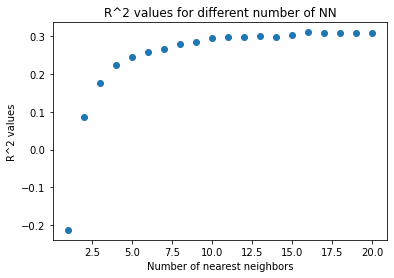

In [48]:
# BEGIN SOLUTION
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
R2_vals = []
for k in range(1,21):
    r2, rmse = knn_kfolds(np.array(X_train), np.array(y_train), 5, k)
    R2_vals.append(r2)
plt.scatter(range(1,21), R2_vals) #Creating plot to determine the best number of neighbors to us
plt.xlabel('Number of nearest neighbors')
plt.ylabel('R^2 values')
plt.title('R^2 values for different number of NN')


# END SOLUTION

In [49]:
#Predictions for test data
knn_model = KNeighborsRegressor(n_neighbors=16)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
cross_val_r2 = r2_score(y_test, y_pred_knn)
cross_val_rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print('RMSE: %f' %(cross_val_rmse))
print('R^2: %f' %(cross_val_r2))

RMSE: 92771.602978
R^2: 0.320654


RMSE: 58564.291241
R^2: 0.729276


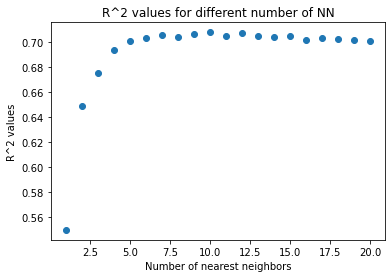

In [50]:
#Same process as before, but now training/testing with engineered data

R2_vals_engr = []
r2 = None
rmse = None
for k in range(1,21):
    r2, rmse = knn_kfolds(np.array(X_train_engineered), np.array(y_train), 5, k)
    R2_vals_engr.append(r2)
plt.scatter(range(1,21), R2_vals_engr)
plt.xlabel('Number of nearest neighbors')
plt.ylabel('R^2 values')
plt.title('R^2 values for different number of NN')


In [52]:
knn_model_engr = KNeighborsRegressor(n_neighbors=10)
knn_model_engr.fit(X_train_engineered, y_train)
y_pred_knn_engr = knn_model_engr.predict(X_test_engineered)
cross_val_r2_engr = r2_score(y_test, y_pred_knn_engr)
cross_val_rmse_engr = np.sqrt(mean_squared_error(y_test, y_pred_knn_engr))
print('RMSE Engineered: %f' %(cross_val_rmse_engr))
print('R^2 Engineered: %f' %(cross_val_r2_engr))

RMSE Engineered: 58696.254334
R^2 Engineered: 0.728055


### Problem 3.2 : Perform Decision Tree Regression 
Perform Decision Tree Regression on the training data.

Predict the output for test dataset using the fitted model.

Print root mean squared error (RMSE) and R^2 from Decision Tree Regression on the test dataset.

**Write-up!** What are the advantages or disadvantages of using Decision Tree over Linear regression and KNN?

An advantage is that I don't have to determine how many neighbors to use, but I do have to determine the best depth of the tree to use. If the data has distinct groups than the depth of the tree is not that large, but if the data is mixed together, than the depth must be large and this can increase the run time. Another advantage of a decision tree is that you don't need to use the training data everytime a new point is added. For KNN, you have to keep the training data so that you can find the nearest neighbors, but for decision trees, once the model is fitted, you don't need to use the training data everytime. 

In [53]:
from sklearn.tree import DecisionTreeRegressor
#using cross validation to determine depth of tree
def tree_kfolds(X_tree_fold, y_tree_fold, n_folds_tree, max_depth_tree, random_state=10):
    rmse_fold_tree = []
    r2_fold_tree = []
    for fold, (train_idx, test_idx) in enumerate(kf.split(X_tree_fold)):
        model_tree_fold = DecisionTreeRegressor(max_depth=max_depth_tree)
        X_tr_tree_fold, X_val_tree_fold, y_tr_tree_fold, y_val_tree_fold = X_tree_fold[train_idx], X_tree_fold[test_idx], y_tree_fold[train_idx], y_tree_fold[test_idx]
        model_tree_fold.fit(X_tr_tree_fold, y_tr_tree_fold)
        y_pred_tree_fold = model_tree_fold.predict(X_val_tree_fold)
        r2 = r2_score(y_val_tree_fold, y_pred_tree_fold)
        r2_fold_tree.append(r2)
        avg_r2 = np.mean(r2_fold_tree)
        rmse =np.sqrt(mean_squared_error(y_val_tree_fold, y_pred_tree_fold))
        rmse_fold_tree.append(rmse)
        avg_rmse = np.mean(rmse_fold_tree)
    return avg_r2, avg_rmse

9


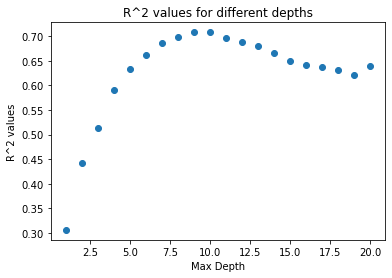

In [54]:
from sklearn.tree import DecisionTreeRegressor
r2_vals_tree = []
for k in range(1,21):
    r2_tree, rmse_tree = tree_kfolds(np.array(X_train), np.array(y_train), 5, k, random_state=10)
    r2_vals_tree.append(r2_tree)
plt.scatter(range(1,21), r2_vals_tree) #Plot to determine best depth of the tree to use
plt.xlabel('Max Depth')
plt.ylabel('R^2 values')
plt.title('R^2 values for different depths')
max_value_tree = max(r2_vals_tree)
max_index_tree = r2_vals_tree.index(max_value_tree)
print(max_index_tree+1)

In [55]:
# BEGIN SOLUTION
#Predictions for test data
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=9, random_state=10)
tree_model.fit(X_train, y_train)

# Predict
ypred_tree = tree_model.predict(X_test)

rmse_tree = np.sqrt(mean_squared_error(y_test, ypred_tree))
r2_tree = r2_score(y_test, ypred_tree)

print('RMSE: %f' %(rmse_tree))
print('R^2: %f' %(r2_tree))
# END SOLUTION

RMSE: 60140.851096
R^2: 0.714504


9
RMSE: 61728.060376
R^2: 0.699236


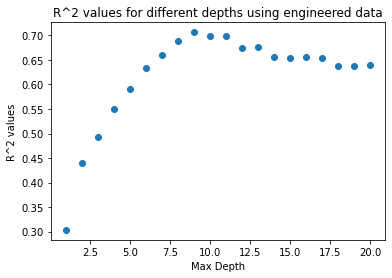

In [56]:
#Same process as before, but now training/testing with engineered data

r2_vals_tree_engr = []
for k in range(1,21):
    r2_tree_engr, rmse_tree_engr = tree_kfolds(np.array(X_train_engineered), np.array(y_train), 5, k, random_state=10)
    r2_vals_tree_engr.append(r2_tree_engr)
plt.scatter(range(1,21), r2_vals_tree_engr)
plt.xlabel('Max Depth')
plt.ylabel('R^2 values')
plt.title('R^2 values for different depths using engineered data')
max_value_tree_engr = max(r2_vals_tree_engr)
max_index_tree_engr = r2_vals_tree_engr.index(max_value_tree_engr)
print(max_index_tree_engr+1)


tree_model_engr = DecisionTreeRegressor(max_depth=9, random_state=10)
tree_model_engr.fit(X_train_engineered, y_train)

# Predict
ypred_tree_engr = tree_model_engr.predict(X_test_engineered)

rmse_tree_engr = np.sqrt(mean_squared_error(y_test, ypred_tree_engr))
r2_tree_engr = r2_score(y_test, ypred_tree_engr)

print('RMSE: %f' %(rmse_tree_engr))
print('R^2: %f' %(r2_tree_engr))


### Problem 3.3 : Perform Random Forest Regression :
Perform Random Forest Regression on the training data.

Predict the output for test dataset using the fitted model.

Print root mean squared error (RMSE) and R^2 from Random Forest Regression on the test dataset.

**Write-up!** How Random Forest ensures better results from Decision Tree and Why? 

A random forest is made up of multiple decision trees, so you can take the averages of all the trees to determine the prediction for a sample. If you only use one tree, you have a higher chance of getting the wrong label, but if you use the average of multiple trees, this increases the chance of a correct prediction.

In [57]:
from sklearn.ensemble import RandomForestRegressor
#Using cross validation to determine best number of trees to use
def forest_kfolds(X_forest_fold, y_forest_fold, n_folds_forest, max_estimators_forest, random_state=10):
    rmse_fold_forest = []
    r2_fold_forest = []
    for fold, (train_idx, test_idx) in enumerate(kf.split(X_forest_fold)):
        model_forest_fold = RandomForestRegressor(n_estimators=max_estimators_forest, random_state=10, max_depth=9)
        X_tr_forest_fold, X_val_forest_fold, y_tr_forest_fold, y_val_forest_fold = X_forest_fold[train_idx], X_forest_fold[test_idx], y_forest_fold[train_idx], y_forest_fold[test_idx]
        model_forest_fold.fit(X_tr_forest_fold, y_tr_forest_fold)
        y_pred_forest_fold = model_forest_fold.predict(X_val_forest_fold)
        r2 = r2_score(y_val_forest_fold, y_pred_forest_fold)
        r2_fold_forest.append(r2)
        avg_r2 = np.mean(r2_fold_forest)
        rmse = np.sqrt(mean_squared_error(y_val_forest_fold, y_pred_forest_fold))
        rmse_fold_forest.append(rmse)
        avg_rmse = np.mean(rmse_fold_forest)
    return avg_r2, avg_rmse

18


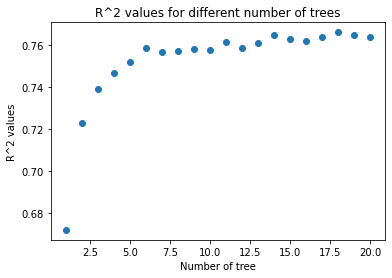

In [58]:
r2_vals_forest = []
for k in range(1, 21):
    r2_forest, rmse_forest = forest_kfolds(np.array(X_train), np.array(y_train), 5, k, random_state=10)
    r2_vals_forest.append(r2_forest)
plt.scatter(range(1,21), r2_vals_forest) #Plot showing best number of trees to use
plt.xlabel('Number of tree')
plt.ylabel('R^2 values')
plt.title('R^2 values for different number of trees')
max_value_forest = max(r2_vals_forest)
max_index_forest = r2_vals_forest.index(max_value_forest)
print(max_index_forest+1)

In [59]:
# BEGIN SOLUTION
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=18, random_state=10, max_depth=9)

forest_model.fit(X_train, y_train)
ypred_forest = forest_model.predict(X_test)

rmse_forest = np.sqrt(mean_squared_error(y_test, ypred_forest))
r2_forest = r2_score(y_test, ypred_forest)

print('RMSE: %f' %(rmse_forest))
print('R^2: %f' %(r2_forest))
# END SOLUTION

RMSE: 53587.917028
R^2: 0.773330


19
RMSE: 54568.145919
R^2: 0.764961


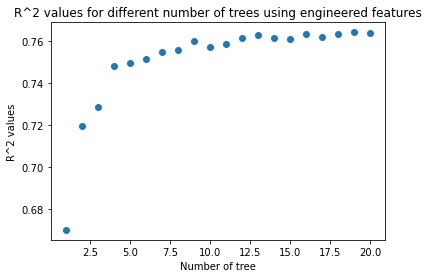

In [60]:
#Same process as before, but now training/testing with engineered data
r2_vals_forest_engr = []
for k in range(1, 21):
    r2_forest_engr, rmse_forest_engr = forest_kfolds(np.array(X_train_engineered), np.array(y_train), 5, k, random_state=10)
    r2_vals_forest_engr.append(r2_forest_engr)
plt.scatter(range(1,21), r2_vals_forest_engr)
plt.xlabel('Number of tree')
plt.ylabel('R^2 values')
plt.title('R^2 values for different number of trees using engineered features')
max_value_forest_engr = max(r2_vals_forest_engr)
max_index_forest_engr = r2_vals_forest_engr.index(max_value_forest_engr)
print(max_index_forest_engr+1)


In [62]:
forest_model_engr = RandomForestRegressor(n_estimators=19, random_state=10, max_depth=9)

forest_model.fit(X_train_engineered, y_train)
ypred_forest_engr = forest_model.predict(X_test_engineered)

rmse_forest_engr = np.sqrt(mean_squared_error(y_test, ypred_forest_engr))
r2_forest_engr = r2_score(y_test, ypred_forest_engr)

print('RMSE: %f' %(rmse_forest_engr))
print('R^2: %f' %(r2_forest_engr))

RMSE: 54568.145919
R^2: 0.764961


### Problem 3.4: Perform Linear Regression with one independent variable

Extract just the median_income column from the independent variables (from X_train and X_test).

Perform Linear Regression to predict housing values based on median_income.

Predict output for test dataset using the fitted model.

Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

Compare the results of the baseline model with this model's result.

**Write-up!** Why there is a difference in performance (if any!) of problem 1.5 and problem 3.4 model? What kind of feature selection is being applied here and what is the intuition behind it. Describe in your words! 

This model is trained using only one feature, but in 1.5, I trained the model using all features. This is statistical feature selection since median income is the most correlated with median house value, so this feature can lead to the best predictions.

In [63]:
med_income_train = X_train_arr[:,7].reshape(-1, 1)
r2_linear_all = np.zeros(5)
rmse_linear_all = np.zeros(5)
for fold, (train_idx, test_idx) in enumerate(kf.split(med_income_train)):
    model_linear_all = LinearRegression()
    model_linear_all.fit(med_income_train[train_idx], y_train_arr[train_idx])
    y_pred_linear_all = model_linear_all.predict(med_income_train[test_idx])
    r2 = r2_score(y_train_arr[test_idx], y_pred_linear_all)
    rmse = np.sqrt(mean_squared_error(y_train_arr[test_idx], y_pred_linear_all))
    r2_linear_all[fold-1] = r2
    rmse_linear_all[fold-1] = rmse
print('R^2: {}' .format(r2_linear_all.mean()))
print('RMSE: {}' .format(rmse_linear_all.mean()))
# END SOLUTION

R^2: 0.4721531507801419
RMSE: 84236.4616194402


In [64]:
# BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
med_income_test = np.array(X_test)[:,7].reshape(-1, 1)
model_lin_1_var = LinearRegression()
model_lin_1_var.fit(med_income_train, y_train)
y_pred_lin_1_var = model_lin_1_var.predict(med_income_test)
rmse_lin_1_var = np.sqrt(mean_squared_error(y_test, y_pred_lin_1_var))
r2_lin_1_var = r2_score(y_test, y_pred_lin_1_var)
print('RMSE: %f' %(rmse_lin_1_var))
print('R^2: %f' %(r2_lin_1_var))
# END SOLUTION

RMSE: 81775.151808
R^2: 0.472158


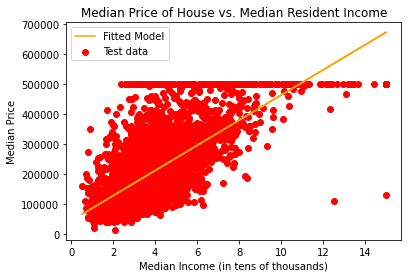

In [65]:
#Plot with testing data
plt.scatter(med_income_test, y_test, color="red", label='Test data')
plt.plot(med_income_test, y_pred_lin_1_var, color="orange", label='Fitted Model')
plt.title('Median Price of House vs. Median Resident Income')
plt.xlabel("Median Income (in tens of thousands)")
plt.ylabel("Median Price")
plt.legend()
plt.show()


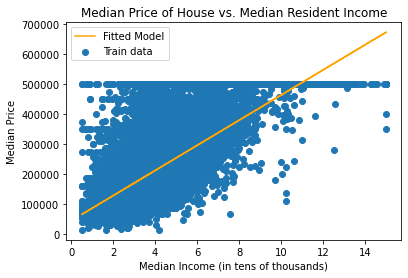

In [66]:
#Plot with training data
plt.scatter(med_income_train, y_train, label='Train data')
plt.plot(med_income_test, y_pred_lin_1_var, color="orange", label='Fitted Model')
plt.title('Median Price of House vs. Median Resident Income')
plt.xlabel("Median Income (in tens of thousands)")
plt.ylabel("Median Price")
plt.legend()
plt.show()


In [67]:
#same process as before, but using engineered features
med_income_train_engr = X_train_engineered[:,7].reshape(-1, 1)
med_income_test_engr = np.array(X_test_engineered)[:,7].reshape(-1, 1)
model_lin_1_var_engr = LinearRegression()
model_lin_1_var_engr.fit(med_income_train_engr, y_train)
y_pred_lin_1_var_engr = model_lin_1_var_engr.predict(med_income_test_engr)
rmse_lin_1_var_engr = np.sqrt(mean_squared_error(y_test, y_pred_lin_1_var_engr))
r2_lin_1_var_engr = r2_score(y_test, y_pred_lin_1_var_engr)
print('RMSE: %f' %(rmse_lin_1_var_engr))
print('R^2: %f' %(r2_lin_1_var_engr))

RMSE: 81775.151808
R^2: 0.472158


## 4. Model Comparision

### Problem 4.1:

Compare all the models results and report the lowest accuracy score.

Visualize all the final models error using R^2 in a bar graph.


The lowest accuracy score is the KNN model with the original data. I think this is because KNN isn't accurate if features aren't of a similar magnitude.

Text(0.5, 1.0, 'r^2 Score for Different Models Using Original Features')

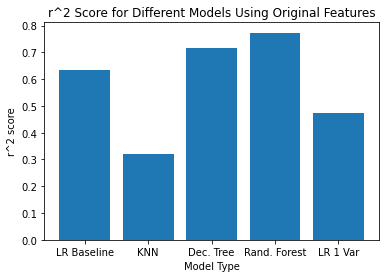

In [68]:
# BEGIN SOLUTION
r2_baseline = r2_linear.mean()
plt.bar(['LR Baseline', 'KNN', 'Dec. Tree', 'Rand. Forest', 'LR 1 Var'], [r2_baseline, cross_val_r2, r2_tree, r2_forest, r2_lin_1_var])
plt.xlabel('Model Type')
plt.ylabel('r^2 score')
plt.title('r^2 Score for Different Models Using Original Features')

# END SOLUTION

### Problem 4.2:

Now review the feature enginnering lab (lab 9) and apply one of the feature selection and/or one feature generation method and use it for prediction on the test data. Evaluate and compare the all the models (LR, DT, RF, K-NN) on original features (no feature engineering) with the ones on the engineered features.
Then, select the best model after the whole comparision.

Visualize the following models with and without feature engineering comparision.
1.  Linear Regression Model (LR-all (Problem 1.5) vs LR-1feature (Problem 3.4).
2.  KNN (No feature engineering KNN vs Feature engineered KNN)
3.  DT (No feature engineering DT vs Feature engineered DT)
4.  RF (No feature engineering RF vs Feature engineered RF)

Visualize all models with feature enginnering in one graph and compare their R^2.

**Write up** Explain which feature selection and/or feature generation method have you selected and why for this dataset.

I only scaled the features for this dataset. I tried also using feature selection, where I used only the features with the highest importance, but when I tested the models using the validation sets, I found the r^2 score went down, so even the features with a lower importance were necessary for making the most accurate model. I also tried generating a feature that classified if the data was taken in a densely populated area, because I thought crowded areas would indicate a city, and city homes are typically more expensive. However, again when I used the validation set on the KNN model, I found the model was worse using this feature. The only way I found that improved the KNN model specifically was scaling the features. My goal was to improve KNN model since this model was shown to be significantly worse than all the others using the original data.

Text(0.5, 1.0, 'r^2 Score for Different Models Using Engineered Features')

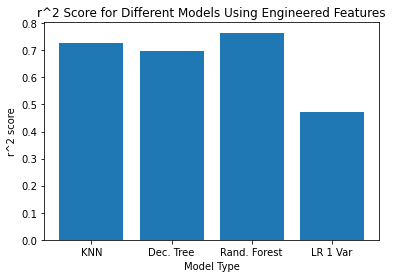

In [69]:
#R^2 score of models using engineered data
plt.bar(['KNN', 'Dec. Tree', 'Rand. Forest', 'LR 1 Var'], [cross_val_r2_engr, r2_tree_engr, r2_forest_engr, r2_lin_1_var_engr], label = "engineered features")
plt.xlabel('Model Type')
plt.ylabel('r^2 score')
plt.title('r^2 Score for Different Models Using Engineered Features')

Text(0.5, 1.0, 'r^2 Score Comparison of Original vs. Engineered Features')

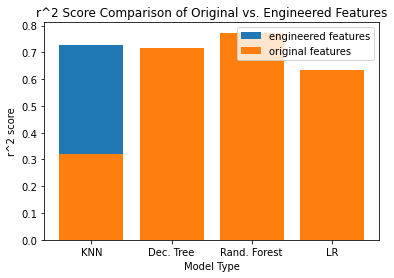

In [70]:
# BEGIN SOLUTION
#Comparing orginal features vs. engineered
plt.bar(['KNN', 'Dec. Tree', 'Rand. Forest', 'LR'], [cross_val_r2_engr, r2_tree_engr, r2_forest_engr, r2_lin_1_var_engr], label = "engineered features")
plt.bar(['KNN', 'Dec. Tree', 'Rand. Forest', 'LR'], [cross_val_r2, r2_tree, r2_forest, r2_baseline], label = "original features")
plt.legend()
plt.xlabel('Model Type')
plt.ylabel('r^2 score')
plt.title('r^2 Score Comparison of Original vs. Engineered Features')

# END SOLUTION


**Write up** Summarize your results and provide some crucial insights about the entire with and without feature engineering process such as which model performed the best and why, based on what metrics and indicators, etc. Which feature engireeing step provided more value to the predictive modeling process?


I didn't find feature selection or generation to be useful for this dataset. This is because all the features that were provided are necessary to determine the price of a house, and the feature I generated was less important than I originally anticipated it to be.

The only model that was significantly improved using the engineered features was the KNN model. This is because KNN makes predictions using the nearest neighbors, which is determined by distance. Originally, not all features were of the same magnitude. For example, median income was always under 15, but total rooms was in the hundreds. This causes median income to have a much bigger weight since the distance between two points in terms of median income will always be small. However, total rooms shouldn't have as small as a weight since a home with more rooms is typically more expensive. Scaling the data helps eliminate this problem so that all features are of similar magnitude and are accounted for equally. 

Models other than KNN were not as significantly impacted by scaling the data, as shown in the graph above. Linear regression wasn't affected since this model determines weights for each of the features, so the difference in magnitude between two features doesn't affect the predictions like it does with KNN. The decision tree and random forest models weren't affected by scaling the data since these models also don't use the distance between two points, so modifying the distance doesn't affect the predictions. The decision boundaries may be different for the scaled data, but the overall predictions aren't really changed.

The linear regression model was affected when I trained with one feature instead of all of the features. When training with just 1, the trends and information from the other features cannot be used for making predictions, so the predictions are less accurate. 

I compared all models using the R^2 score. Any model with a higher R^2 score was considered better than one with a lower score.


In [71]:
# BEGIN SOLUTION

# END SOLUTION

In [72]:
grader.check("hw9")

hw9 results: All test cases passed!

<!-- END QUESTION -->

Note that we have a dummy test here to generate a pdf on Gradescope, but the entire assignment is manually graded. So make sure your notebook communicates your thoughts and process!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [73]:
grader.check_all()

hw9 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)